# **Group Assignment** - Bike Sharing

- `instant`: record index
- `dteday` : date
- `season` : season (1:springer, 2:summer, 3:fall, 4:winter)
- `yr` : year (0: 2011, 1:2012)
- `mnth` : month ( 1 to 12)
- `hr` : hour (0 to 23)
- `holiday` : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- `weekday` : day of the week
- `workingday` : if day is neither weekend nor holiday is 1, otherwise is 0.
+ `weathersit` : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- `temp` : Normalized temperature in Celsius. The values are divided to 41 (max)
- `atemp`: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- `hum`: Normalized humidity. The values are divided to 100 (max)
- `windspeed`: Normalized wind speed. The values are divided to 67 (max)
- `casual`: count of casual users
- `registered`: count of registered users
- `cnt`: count of total rental bikes including both casual and registered

## PART I: Exploratory Data Analysis

## PART II: Prediction Model

In [83]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [72]:
data = pd.read_csv("bike-sharing_hourly.csv")

In [44]:
weather = data.groupby(["yr","mnth","day","hr"]).agg({
        'cnt':'mean',
        'weathersit': 'mean'
        })

weather.groupby(["yr","mnth","day","hr"])["cnt"].sum()

yr  mnth  day  hr
0   1     01   0      16.0
               1      40.0
               2      32.0
               3      13.0
               4       1.0
                     ...  
1   12    31   19    119.0
               20     89.0
               21     90.0
               22     61.0
               23     49.0
Name: cnt, Length: 17379, dtype: float64

In [85]:
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [73]:
data['day'] = data['dteday'].apply(lambda x: str(x)[-2:])

In [74]:
data = data.drop(["dteday","casual","registered","instant","yr","temp"],axis=1)

In [75]:
data.to_csv('cleaned_data.csv', index=False)

In [177]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   mnth        17379 non-null  int64  
 2   hr          17379 non-null  int64  
 3   holiday     17379 non-null  int64  
 4   weekday     17379 non-null  int64  
 5   workingday  17379 non-null  int64  
 6   weathersit  17379 non-null  int64  
 7   temp        17379 non-null  float64
 8   atemp       17379 non-null  float64
 9   hum         17379 non-null  float64
 10  windspeed   17379 non-null  float64
 11  cnt         17379 non-null  int64  
 12  day         17379 non-null  object 
dtypes: float64(4), int64(8), object(1)
memory usage: 1.7+ MB


In [76]:
# Split data into features and target
X = data.drop(["cnt"], axis=1).values 
y = data["cnt"].values

In [77]:
# Split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [127]:
# Comment on why chose Random Forest Regressor

In [78]:
# Instatiate and fit random forest regressor
random_forest = RandomForestRegressor(random_state=42, max_features='sqrt')  
random_forest.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', random_state=42)

In [128]:
# Comment on hyperparameter tuning and on why this evaluation metric was chosen

In [87]:
# GridSearchCV for hyperparameter tuning
param_grid = {'max_depth': range(20,25)}

crossval_rf = GridSearchCV(random_forest, param_grid, scoring='r2', cv=5 , n_jobs=1, verbose=1)

crossval_rf.fit(X_train,y_train);

Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [88]:
print("Best parameters set found on train set:")
print()
print(crossval_rf.best_params_)
print()
print("Grid scores on train set:")
print()
means = crossval_rf.cv_results_['mean_test_score']
stds = crossval_rf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, crossval_rf.cv_results_['params']):
    print("Negative MSE = %0.3f (+/%0.03f) for %r" % (mean, std * 2, params))

Best parameters set found on train set:

{'max_depth': 22}

Grid scores on train set:

Negative MSE = 0.841 (+/0.019) for {'max_depth': 20}
Negative MSE = 0.843 (+/0.019) for {'max_depth': 21}
Negative MSE = 0.845 (+/0.016) for {'max_depth': 22}
Negative MSE = 0.843 (+/0.019) for {'max_depth': 23}
Negative MSE = 0.841 (+/0.017) for {'max_depth': 24}


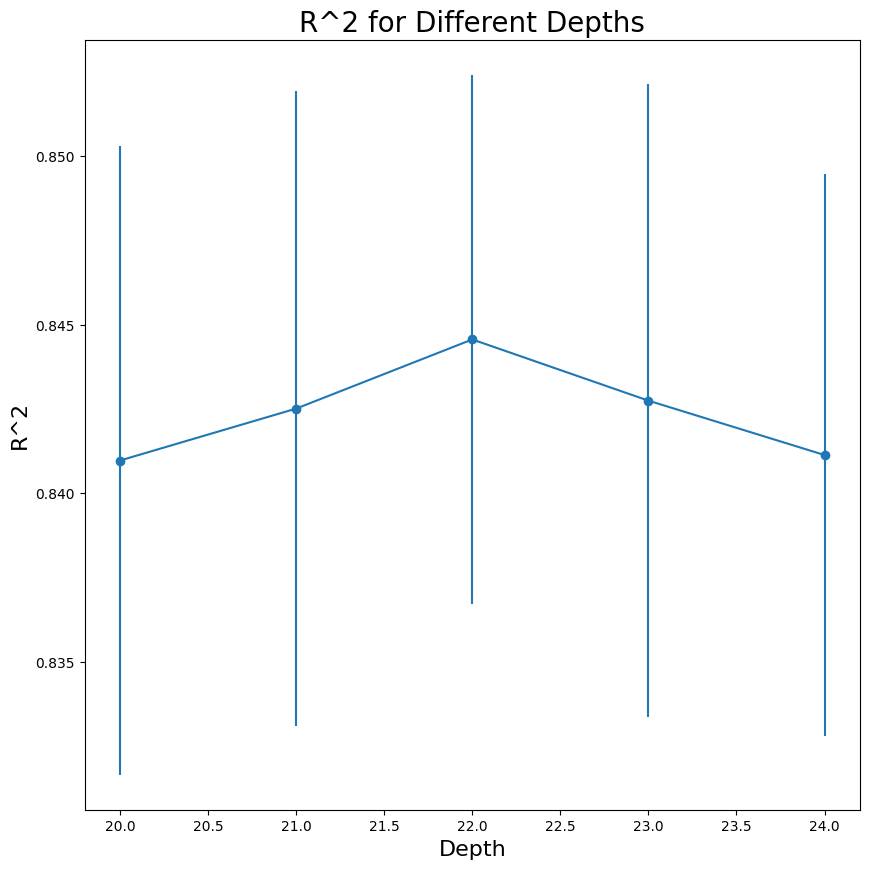

In [102]:
# Visualize the different accuracies for different depths of the decision tree
plt.figure(figsize=(10,10))
plt.errorbar(range(20,25,1), [m for m in means], yerr=stds, fmt='-o')
plt.title('R^2 for Different Depths', fontsize=20)
plt.xlabel("Depth", fontsize=16)
plt.ylabel("R^2", fontsize=16)
plt.show()

In [103]:
crossval_rf.cv_results_['params']

[{'max_depth': 20},
 {'max_depth': 21},
 {'max_depth': 22},
 {'max_depth': 23},
 {'max_depth': 24}]

In [90]:
# Save model for future use
best_est = crossval_rf.best_estimator_

joblib.dump(best_est,"Model2.joblib")

['Model2.joblib']

In [105]:
max_depth = crossval_rf.cv_results_['params']

joblib.dump(max_depth,"depths.joblib")
joblib.dump(means,"means.joblib")
joblib.dump(stds,"stds.joblib")

['stds.joblib']

In [91]:
model = joblib.load("Model2.joblib")

In [106]:
means = joblib.load("means.joblib")

In [108]:
depth = [20,21,22,23,24]

In [113]:
list = list(means)

In [116]:
frame = [[depth[0], list[0]], [depth[1], list[1]], [depth[2], list[2]],[depth[3], list[3]],[depth[4], list[4]]]

In [117]:
df = pd.DataFrame(frame, columns=['Max_Depth','R2'])

In [118]:
df

,Max_Depth,R2
0,20,0.840974
1,21,0.842512
2,22,0.844560
3,23,0.842748
4,24,0.841136


In [120]:
import plotly.express as px
fig3 = px.line(df, 
            x='Max_Depth', 
            y='R2', 
            labels={"Max_Depth": 'Max Depth', "R2": 'R^2'},
            title='R^2 by Different Max Depths')
fig3

In [94]:
# R2 for test set is slightly worse than for train set
print("R^2: Train = {0:.4f}".format(np.mean(cross_val_score(model, X_train, y_train, scoring='r2'))))
print("R^2: Test = {0:.4f}".format(np.mean(cross_val_score(model, X_test, y_test, scoring='r2'))))

#neg_root_mean_squared_error

R^2: Train = 0.8446
R^2: Test = 0.7888


In [96]:
drop_data = data.drop(["cnt"],axis=1)

In [98]:
import plotly.express as px
fig = px.bar(model.feature_importances_, 
            x=model.feature_importances_, 
            y=drop_data.columns, 
            labels={"cnt": 'Count of Rentals',"weathersit": 'Weather Type'},
            title='Count of Rentals by Weather',
            barmode='group')

In [99]:
fig.show()

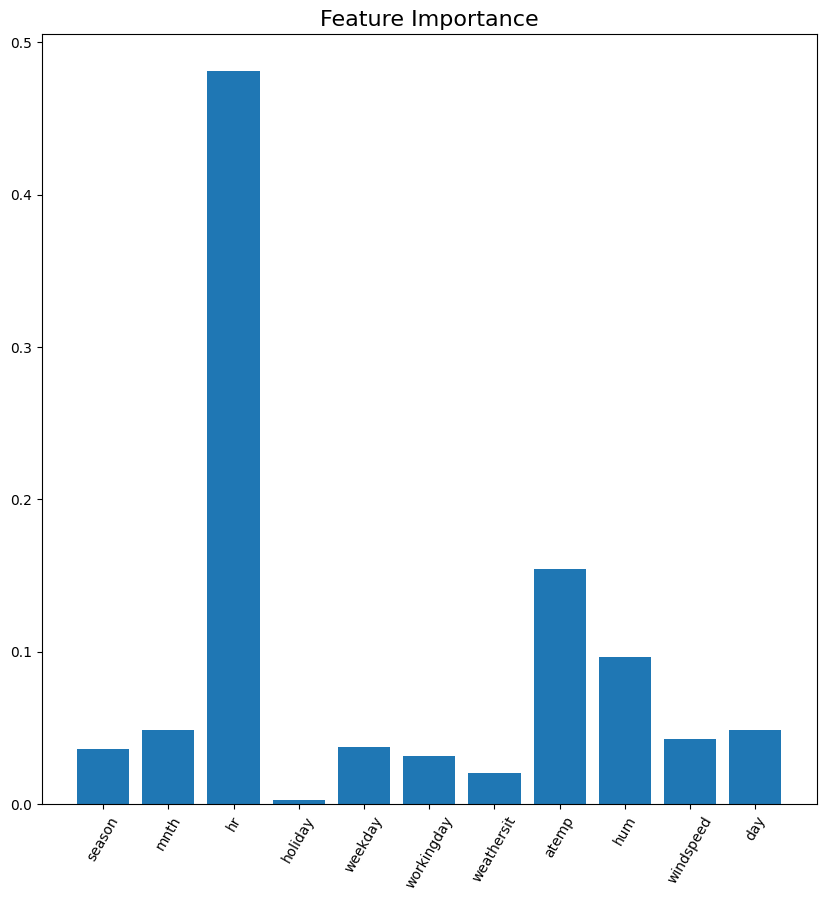

In [100]:
# Plot feature importances for the random forest
plt.figure(figsize=(10,10))
plt.bar(drop_data.columns, model.feature_importances_)
plt.xticks(rotation=60)
plt.title('Feature Importance', fontsize=16)
plt.show()

In [126]:
# Comment what the feature importance tells us about how to predict !

## PART III: Streamlit dashboard

In [ ]:
### This part goes in a separate script ###

In [ ]:
# Make temperature on x by demand on y
# Demand over the day by weekdays and by weekends